In [1]:
# 多项式回归问题
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

[[ 0.          1.295      -0.00164286]]
[ 89.]


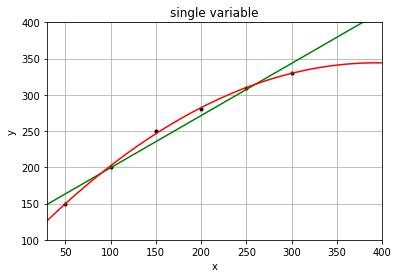

In [2]:
plt.figure() # 实例化作图变量
plt.title('single variable') # 图像标题
plt.xlabel('x') # x轴文本
plt.ylabel('y') # y轴文本
plt.axis([30, 400, 100, 400])
plt.grid(True) # 是否绘制网格线

x = [[50],[100],[150],[200],[250],[300]]
y = [[150],[200],[250],[280],[310],[330]]
x_test = [[250],[300]] # 用来做最终效果测试
y_test = [[310],[330]] # 用来做最终效果测试
plt.plot(x, y, 'k.')

model = LinearRegression()
model.fit(x, y)
x2 = [[30], [400]]
y2 = model.predict(x2)
plt.plot(x2, y2, 'g-') # 线性回归

xx = np.linspace(30, 400, 100) # 设计x轴一系列点作为画图的x点集
quadratic_featurizer = PolynomialFeatures(degree=2) # 实例化一个二次多项式特征实例，可以把degree改成3，效果提升不会太多，而且会导致过拟合。
x_train_quadratic = quadratic_featurizer.fit_transform(x) # 用二次多项式对样本X值做变换
# x被转换为[1, x, x^2]
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1)) # 把训练好X值的多项式特征实例应用到一系列点上,形成矩阵
regressor_quadratic = LinearRegression() # 创建一个线性回归实例
regressor_quadratic.fit(x_train_quadratic, y) # 以多项式变换后的x值为输入，代入线性回归模型做训练
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-') # 用训练好的模型作图
print(regressor_quadratic.coef_)
print(regressor_quadratic.intercept_)

In [3]:
model.score(x_test, y_test) # 线性模型分数

0.07555555555555149

In [4]:
x_test_quadratic = quadratic_featurizer.transform(x_test)
regressor_quadratic.score(x_test_quadratic, y_test) # 二次多项式回归分数

0.99933673469387985